## king countyt ev fiyat tahmin
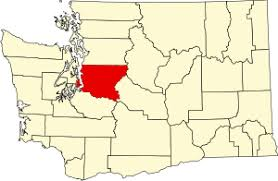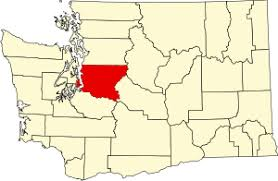

bu çalışmada washingthon KC deki ev gitarlarini tahminleyen bir model oluşturuldu 

# Veri Seti Açıklaması

Bu veri seti, Seattle'ı içeren King County için ev satış fiyatlarını içermektedir. Mayıs 2014 ile Mayıs 2015 arasında satılan evleri kapsar.

Basit regresyon modellerini değerlendirmek için harika bir veri setidir.

## Veri Sözlüğü

- *id*: Bir ev için id no
- *date*: Evin satıldığı tarih
- *price*: Fiyat, [tahmin hedefi, y]
- *bedrooms*: Yatak odası sayısı
- *bathrooms*: Banyo sayısı/yatak odası
- *sqft_living*: Evdeki alanın metrekare cinsinden büyüklüğü
- *sqft_lot*: Arsanın metrekare cinsinden büyüklüğü
- *floors*: Evdeki toplam kat sayısı
- *waterfront*: Su manzaralı ev
- *view*: Manzara
- *condition*: Genel olarak evin durumu ne kadar iyi
- *grade*: King County derecelendirme sistemi temelinde konut birimine verilen genel derece
- *sqft_above*: Bodrum hariç evin metrekare cinsinden büyüklüğü
- *sqft_basement*: Bodrumun metrekare cinsinden büyüklüğü
- *yr_built*: Yapım yılı
- *yr_renovated*: Restorasyon yılı
- *zipcode*: Posta kodu
- *lat*: Enlem koordinatı
- *long*: Boylam koordinatı
- *sqft_living15*: 2015 yılında oturma odası alanı (bazı yenilemeleri ima eder). Bu, arsa büyüklüğü alanını etkilemiş olabilir veya olmayabilir.
- *sqft_lot15*: 2015 yılında arsa büyüklüğü (bazı yenilemeleri ima eder).


## kütüphanelerin yüklenmesi

In [5]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime 
import numpy as np

## 2.verisetinin yüklenmesi


In [7]:
df=pd.read_csv("kc_house_data.csv")

## VERİ ÖN İŞLEME
# keşifsel veri analizi

In [9]:
pd.set_option("display.max_columns",None)

In [10]:
# veri setini incele
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [11]:
#max yatak odası sayısı
df["bedrooms"].max()

33

<Axes: ylabel='Frequency'>

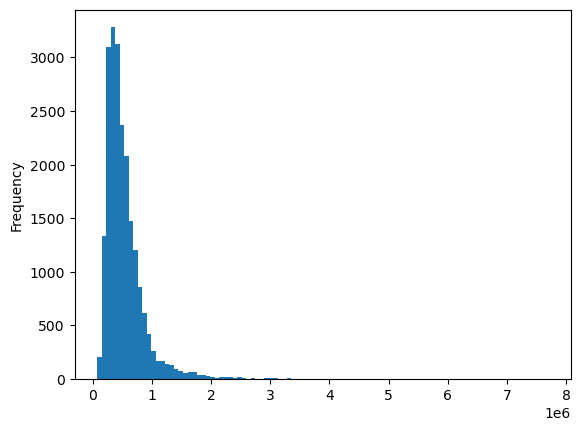

In [12]:
df.price.plot(kind="hist",bins=100)

In [13]:
df[df["price"]==df["price"].max()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.0,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800


In [14]:
#veri setinin şekli(satır * stun)
df.shape

(21613, 21)

## kolarasyon

In [16]:
df.corr(numeric_only=True)["price"].sort_values(ascending=False)
df2=df.copy()

# aykırı değerleri incelemek
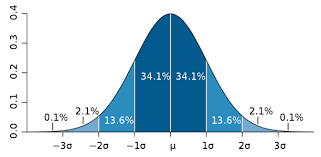 

In [18]:
df_bedrooms_outliers_max=df2[df2["bedrooms"]>df2["bedrooms"].mean()+3*df2["bedrooms"].std()]

In [19]:
df_bedrooms_outliers_max

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
556,5486800070,20140620T000000,1950000.0,7,3.50,4640,15235,2.0,0,1,3,11,2860,1780,1965,2003,98040,47.5666,-122.231,3230,20697
1135,4024100951,20150105T000000,420000.0,7,3.00,2940,8624,1.0,0,0,3,8,1690,1250,1977,0,98155,47.7555,-122.307,1850,8031
1241,7227802030,20140623T000000,350000.0,7,3.00,2800,9569,1.0,0,2,3,7,1400,1400,1963,0,98056,47.5102,-122.183,2150,7333
1660,9126101740,20141204T000000,490000.0,8,5.00,2800,2580,2.0,0,0,3,8,1880,920,1997,0,98122,47.6086,-122.303,1800,2580
3721,5451100490,20150115T000000,884900.0,7,4.75,5370,10800,1.5,0,0,3,8,5370,0,1967,0,98040,47.5380,-122.223,2310,10910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18823,4040500100,20141020T000000,539000.0,7,2.25,2620,6890,2.0,0,0,4,7,2620,0,1961,0,98007,47.6123,-122.134,2070,7910
18975,1778360150,20140620T000000,1240000.0,7,5.50,6630,13782,2.0,0,0,3,10,4930,1700,2004,0,98006,47.5399,-122.118,4470,8639
19254,8812401450,20141229T000000,660000.0,10,3.00,2920,3745,2.0,0,0,4,7,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745
19302,3756900027,20141125T000000,575000.0,8,3.00,3840,15990,1.0,0,0,3,7,2530,1310,1961,0,98034,47.7111,-122.211,1380,8172


In [20]:
df2["bedrooms"].mean()

3.37084162309721

In [21]:
df2["bedrooms"].std()

0.9300618311474632

In [22]:
3.4+3*0.93# aykırı değer hesaplama    6.18 den büyük olanlar aykırı değerdir

6.1899999999999995

In [23]:
df_bedrooms_outliers_min=df2[df2["bedrooms"]<df2["bedrooms"].mean()-3*df2["bedrooms"].std()]# minimum aykırı değer oluyor

In [24]:
df2["bedrooms"].mean()-3*df2["bedrooms"].std()# 0,5 den küçük yatak odası olan evler aykırıdır

0.58065612965482

 ## quantile yöntemi 

In [26]:
df_kor=df[["price","bedrooms","bathrooms","sqft_living","sqft_lot"]]

In [27]:
outliers=df_kor.quantile(q=0.99)# verinin yüzde 99 unun kullanır 

In [28]:
outliers.head() #kırptıktan sonraki max veriler

price          1964400.00
bedrooms             6.00
bathrooms            4.25
sqft_living       4978.80
sqft_lot        213008.00
Name: 0.99, dtype: float64

In [29]:
df3=df2[df2["price"]<=outliers["price"]]

In [30]:
df3.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.139600e+04,2.139600e+04,21396.000000,21396.000000,21396.000000,2.139600e+04,21396.000000,21396.000000,21396.000000,21396.000000,21396.000000,21396.000000,21396.000000,21396.000000,21396.000000,21396.000000,21396.000000,21396.000000,21396.000000,21396.000000
mean,4.586696e+09,5.181153e+05,3.360909,2.097460,2050.491400,1.499324e+04,1.490512,0.005328,0.216255,3.408254,7.626239,1766.210273,284.281127,1970.989250,82.271593,98078.083333,47.559458,-122.213655,1971.608058,12696.709712
std,2.877291e+09,2.845875e+05,0.923862,0.746921,861.406875,4.097949e+04,0.539255,0.072801,0.729263,0.649551,1.135380,791.592670,430.401009,29.307383,396.793784,53.470361,0.139050,0.141226,668.096205,27203.764165
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.124547e+09,3.200000e+05,3.000000,1.500000,1420.000000,5.026000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.750000,0.000000,98033.000000,47.469075,-122.329000,1480.000000,5100.000000
50%,3.905000e+09,4.500000e+05,3.000000,2.250000,1900.000000,7.575500e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1550.000000,0.000000,1975.000000,0.000000,98065.000000,47.570700,-122.230000,1830.000000,7600.000000
75%,7.320653e+09,6.350000e+05,4.000000,2.500000,2520.000000,1.054850e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2190.000000,550.000000,1997.000000,0.000000,98118.000000,47.678400,-122.124000,2340.000000,10021.250000
max,9.900000e+09,1.960000e+06,33.000000,7.500000,7730.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,7420.000000,3260.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,871200.000000


In [31]:
df3=df3[df3["bedrooms"]<=outliers["bedrooms"]]
df3["bedrooms"].max()

6

In [32]:
df3=df3[df3["bathrooms"]<=outliers["bathrooms"]]
df3["bathrooms"].max()

4.25

In [33]:
df3=df3[df3["sqft_living"]<=outliers["sqft_living"]]
df3=df3[df3["sqft_lot"]<=outliers["sqft_lot"]]

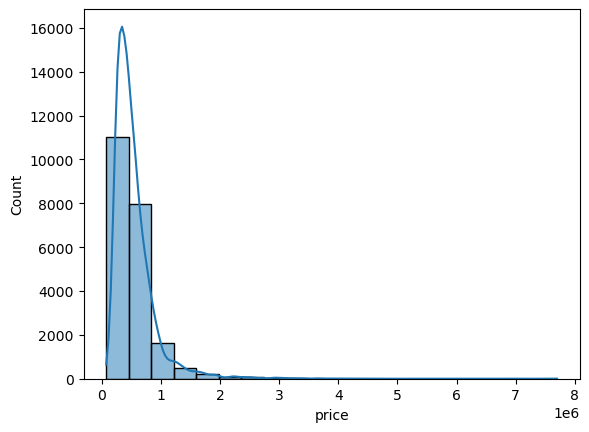

In [34]:
sns.histplot(df["price"],bins=20,kde=True);


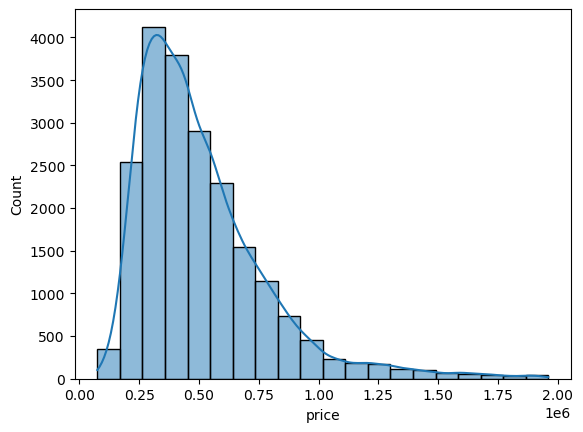

In [35]:
sns.histplot(df3["price"],bins=20,kde=True);

In [36]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
id,20940.0,4.617228e+09,2.875567e+09,1.000102e+06,2.143701e+09,3.959402e+09,7.340601e+09,9.900000e+09
price,20940.0,5.097269e+05,2.736793e+05,7.500000e+04,3.190000e+05,4.450000e+05,6.250000e+05,1.960000e+06
bedrooms,20940.0,3.336103e+00,8.658670e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,6.000000e+00
bathrooms,20940.0,2.070021e+00,7.095094e-01,0.000000e+00,1.500000e+00,2.250000e+00,2.500000e+00,4.250000e+00
sqft_living,20940.0,2.012450e+03,8.000403e+02,2.900000e+02,1.410000e+03,1.890000e+03,2.490000e+03,4.970000e+03
sqft_lot,20940.0,1.178168e+04,1.918187e+04,5.200000e+02,5.000000e+03,7.500000e+03,1.032000e+04,2.130080e+05
floors,20940.0,1.484694e+00,5.390056e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.500000e+00
waterfront,20940.0,5.205349e-03,7.196180e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,20940.0,2.052531e-01,7.100831e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,20940.0,3.411509e+00,6.510388e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [37]:
df3.zipcode.dtype    #zipcode yazarak kullanılabilir  bunlar aslında katagorik veridir

dtype('int64')

In [38]:
df3["zipcode"]=df["zipcode"].astype("category")

In [39]:
df3.zipcode.dtype #verilerin hepsini bir katagori olarak aldı

CategoricalDtype(categories=[98001, 98002, 98003, 98004, 98005, 98006, 98007, 98008,
                  98010, 98011, 98014, 98019, 98022, 98023, 98024, 98027,
                  98028, 98029, 98030, 98031, 98032, 98033, 98034, 98038,
                  98039, 98040, 98042, 98045, 98052, 98053, 98055, 98056,
                  98058, 98059, 98065, 98070, 98072, 98074, 98075, 98077,
                  98092, 98102, 98103, 98105, 98106, 98107, 98108, 98109,
                  98112, 98115, 98116, 98117, 98118, 98119, 98122, 98125,
                  98126, 98133, 98136, 98144, 98146, 98148, 98155, 98166,
                  98168, 98177, 98178, 98188, 98198, 98199],
, ordered=False, categories_dtype=int64)

In [40]:
df3.zipcode.nunique()

70

In [41]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20940 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             20940 non-null  int64   
 1   date           20940 non-null  object  
 2   price          20940 non-null  float64 
 3   bedrooms       20940 non-null  int64   
 4   bathrooms      20940 non-null  float64 
 5   sqft_living    20940 non-null  int64   
 6   sqft_lot       20940 non-null  int64   
 7   floors         20940 non-null  float64 
 8   waterfront     20940 non-null  int64   
 9   view           20940 non-null  int64   
 10  condition      20940 non-null  int64   
 11  grade          20940 non-null  int64   
 12  sqft_above     20940 non-null  int64   
 13  sqft_basement  20940 non-null  int64   
 14  yr_built       20940 non-null  int64   
 15  yr_renovated   20940 non-null  int64   
 16  zipcode        20940 non-null  category
 17  lat            20940 non-null  float

## emlakçıdan bilgi aldık
özelliklerin giyara etkisinde ağırlıklarının farklı olduğunu öğrendik

In [43]:
df3.bedrooms=df3.bedrooms**2 # yatak odası sayısı fiyat üzerinde dominant bir etkiye sahip olduğu için 

In [44]:
df3.bathrooms=df3.bathrooms**2#daha iyi tahminler yapabilmesi için karelerini aldık

In [45]:
df3.sqft_living=df3.sqft_living**2

In [46]:
df3["age"]=2015-df3.yr_built #yapım yılından 2015 den çıkartıp yaşını bulabiliyoruz

In [47]:
df3[df3["yr_built"] == 1900]
df3["koordinat"]=df3["lat"].astype("str")+","+df3["long"].astype("str")
df3["koordinat"].head()

0    47.5112,-122.257
1     47.721,-122.319
2    47.7379,-122.233
3    47.5208,-122.393
4    47.6168,-122.045
Name: koordinat, dtype: object

In [48]:
df3["age"]

0        60
1        64
2        82
3        50
4        28
         ..
21608     6
21609     1
21610     6
21611    11
21612     7
Name: age, Length: 20940, dtype: int64

In [49]:
# restorasyon
df3["yr_renovated"].max()

2015

In [50]:
df3

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,koordinat
0,7129300520,20141013T000000,221900.0,9,1.0000,1392400,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,60,"47.5112,-122.257"
1,6414100192,20141209T000000,538000.0,9,5.0625,6604900,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,64,"47.721,-122.319"
2,5631500400,20150225T000000,180000.0,4,1.0000,592900,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,82,"47.7379,-122.233"
3,2487200875,20141209T000000,604000.0,16,9.0000,3841600,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,50,"47.5208,-122.393"
4,1954400510,20150218T000000,510000.0,9,4.0000,2822400,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,28,"47.6168,-122.045"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,9,6.2500,2340900,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,6,"47.6993,-122.346"
21609,6600060120,20150223T000000,400000.0,16,6.2500,5336100,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,1,"47.5107,-122.362"
21610,1523300141,20140623T000000,402101.0,4,0.5625,1040400,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,6,"47.5944,-122.299"
21611,291310100,20150116T000000,400000.0,9,6.2500,2560000,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,11,"47.5345,-122.069"


In [51]:
#restorasyon yapılmış mı yapılmamış mı   0 a eşitse 0 yap içinde sayı varsa 1 yaz
df3["yr_renovated"]=np.where(df3["yr_renovated"]==0,0,1)
df3["yr_renovated"]                             
               

0        0
1        1
2        0
3        0
4        0
        ..
21608    0
21609    0
21610    0
21611    0
21612    0
Name: yr_renovated, Length: 20940, dtype: int32

In [52]:
# bodrum var yok
df3["sqft_basement"]=np.where(df3["sqft_basement"]==0,0,1)
df3["sqft_basement"]

0        0
1        1
2        0
3        1
4        0
        ..
21608    0
21609    0
21610    0
21611    0
21612    0
Name: sqft_basement, Length: 20940, dtype: int32

In [53]:
df3['sqft_all']=df3['sqft_living']+df3['sqft_basement']+df3["sqft_above"]
df3['sqft_all']

0        1393580
1        6607071
2         593670
3        3842651
4        2824080
          ...   
21608    2342430
21609    5338410
21610    1041420
21611    2561600
21612    1041420
Name: sqft_all, Length: 20940, dtype: int64

 ###  özellikleri ve verileri belirleme (x,y)

 x=evin giyatk-unu etkileyen özellikler . feature  bağımsız değişkenler , öz nitelikler 

 
 y =evin fiyaı ,hedef değişken ,bağımlı değişken

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [56]:
y=df3["price"]
x=df3.drop(["price","date","lat","long","koordinat"],axis=1)

In [57]:
x

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,age,sqft_all
0,7129300520,9,1.0000,1392400,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,60,1393580
1,6414100192,9,5.0625,6604900,7242,2.0,0,0,3,7,2170,1,1951,1,98125,1690,7639,64,6607071
2,5631500400,4,1.0000,592900,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,82,593670
3,2487200875,16,9.0000,3841600,5000,1.0,0,0,5,7,1050,1,1965,0,98136,1360,5000,50,3842651
4,1954400510,9,4.0000,2822400,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,28,2824080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,9,6.2500,2340900,1131,3.0,0,0,3,8,1530,0,2009,0,98103,1530,1509,6,2342430
21609,6600060120,16,6.2500,5336100,5813,2.0,0,0,3,8,2310,0,2014,0,98146,1830,7200,1,5338410
21610,1523300141,4,0.5625,1040400,1350,2.0,0,0,3,7,1020,0,2009,0,98144,1020,2007,6,1041420
21611,291310100,9,6.2500,2560000,2388,2.0,0,0,3,8,1600,0,2004,0,98027,1410,1287,11,2561600


In [58]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 20940, dtype: float64

## katagorik verileri sayıya çevirmek gerektirir 
 one hot encoding 3 katagoride oluşan bir veri setini 3 stuna bölerek 1 0 0 ,0 1 0 ,0 0 1    şeklinde bölüyor

In [60]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20940 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             20940 non-null  int64   
 1   bedrooms       20940 non-null  int64   
 2   bathrooms      20940 non-null  float64 
 3   sqft_living    20940 non-null  int64   
 4   sqft_lot       20940 non-null  int64   
 5   floors         20940 non-null  float64 
 6   waterfront     20940 non-null  int64   
 7   view           20940 non-null  int64   
 8   condition      20940 non-null  int64   
 9   grade          20940 non-null  int64   
 10  sqft_above     20940 non-null  int64   
 11  sqft_basement  20940 non-null  int32   
 12  yr_built       20940 non-null  int64   
 13  yr_renovated   20940 non-null  int32   
 14  zipcode        20940 non-null  category
 15  sqft_living15  20940 non-null  int64   
 16  sqft_lot15     20940 non-null  int64   
 17  age            20940 non-null  int64

In [61]:
x.drop('id',axis=1, inplace=True) #id yi sütun oalrak çıkar yerinde değiştir.



In [62]:
x=pd.get_dummies(x,columns=["zipcode"],drop_first=True)
x

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,age,sqft_all,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,9,1.0000,1392400,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650,60,1393580,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,9,5.0625,6604900,7242,2.0,0,0,3,7,2170,1,1951,1,1690,7639,64,6607071,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,4,1.0000,592900,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062,82,593670,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,16,9.0000,3841600,5000,1.0,0,0,5,7,1050,1,1965,0,1360,5000,50,3842651,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,9,4.0000,2822400,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503,28,2824080,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,9,6.2500,2340900,1131,3.0,0,0,3,8,1530,0,2009,0,1530,1509,6,2342430,False,False,False,False,Fals

## standar scaler ile ölcekleme


In [64]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [65]:
x_scaler=scaler.fit_transform(x)
x_scaler


array([[-0.47617207, -1.24672541, -0.86820673, ..., -0.08025241,
        -0.11620543, -0.12197982],
       [-0.47617207,  0.09021473,  0.50416808, ..., -0.08025241,
        -0.11620543, -0.12197982],
       [-1.30306811, -1.24672541, -1.07870336, ..., -0.08025241,
        -0.11620543, -0.12197982],
       ...,
       [-1.30306811, -1.39070358, -0.96088317, ..., -0.08025241,
        -0.11620543, -0.12197982],
       [-0.47617207,  0.48101261, -0.56079477, ..., -0.08025241,
        -0.11620543, -0.12197982],
       [-1.30306811, -1.39070358, -0.96088317, ..., -0.08025241,
        -0.11620543, -0.12197982]])

In [66]:
from sklearn.model_selection import train_test_split 

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# 4 - veri setini eğitim ve test olarak ayırırız


In [69]:
##modelleme

In [70]:
df3["price"].mean()

509726.9011461318

In [71]:
#pip install xgboost

In [72]:
# tüm modelleri kullan
#from all_regression_hoca import algo_test
#algo_test(x,y)

In [73]:
from xgboost import XGBRegressor

# model oluştur
model =XGBRegressor()
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

##  5. değerlendirme Evulation

In [75]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
y_pred=model.predict(x_test)

In [76]:
r2_score(y_test,y_pred)

0.847644422202588

In [87]:
print("MAE")
print(mean_absolute_error(y_test,y_pred))

MAE
69870.56397183919
